In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.linear_model import LinearRegression

import pickle

In [50]:

#pickle_file = open("dic_IPA_cal.pkl", "rb")


#dic_IPA = pickle.load(pickle_file)

#pickle_file = open("dic_Methanol_cal.pkl", "rb")
#dic_Methanol = pickle.load(pickle_file)

pickle_file = open("dic_Ethanol_cal.pkl", "rb")
dic_Ethanol = pickle.load(pickle_file)

pickle_file = open("dic_samples.pkl", "rb")
dic_samples = pickle.load(pickle_file)



pickle_file = open("dic_samples_norm.pkl", "rb")
dic_samples_norm = pickle.load(pickle_file)

pickle_file = open("dic_solvents.pkl","rb")
dic_solvents = pickle.load(pickle_file)

In [51]:
nafion = dic_samples['20-10-23 Nafion EtOH']['0_ EtOH 90 min.CSV']

In [52]:
low = 650
high = 3600


wn = nafion.index
wn =wn[wn > low];

wn = wn[wn < high];

In [53]:
lab_samples = '20-10-25 Nafion EtOH-Water';
col_labels = np.round(wn,2).astype('str')
samples = pd.DataFrame(index = dic_samples[lab_samples].keys(),columns = col_labels)


for j in dic_samples[lab_samples]:
    df = dic_samples[lab_samples][j]
    df = df.loc[df.index>low]
    df = df.loc[df.index<high]
    samples.loc[j,:] = list(df.Absorbance)

water_sat_val = [87.5,75,62.5,50,37.5,25,12.5]

solvent_sat_val = [12.5,25,37.5,50,62.5,75,87.5]

samples['EtOH sat'] = solvent_sat_val

samples['water sat'] = water_sat_val

samples.sort_values(by = ['EtOH sat'],axis = 0, inplace = True)


In [54]:
ethanol = dic_samples['20-10-23 Nafion EtOH']['100_ EtOH 2 hr.CSV']
ethanol = ethanol.loc[ethanol.index>low]#& nafion.index <1300]
ethanol = ethanol.loc[ethanol.index<high]

In [55]:
water = dic_samples['20-09-30 Nafion Water']['100_ DI 120 min.CSV']
water = water.loc[water.index>low]#& nafion.index <1300]
water = water.loc[water.index<high]

In [56]:
nafion = nafion.loc[nafion.index>low]#& nafion.index <1300]
nafion = nafion.loc[nafion.index<high]

In [57]:

legend = ['water','EtOH','nafion']
legend.extend(list(dic_samples_norm[lab_samples].keys()))
legend



['water',
 'EtOH',
 'nafion',
 '12.5_ EtOH 87.5_ DI.CSV',
 '25_ EtOH 75_ DI 2 hr.CSV',
 '37.5_ EtOH 62.5_ DI 2 hrs.CSV',
 '50_ EtOH 50_ DI 2 hr.CSV',
 '62.5_ EtOH 37.5_ DI 2 hr.CSV',
 '75_ EtOH 25_ DI 2 hr.CSV',
 '87.5_ EtOH 12.5_ DI 2 hr.CSV']

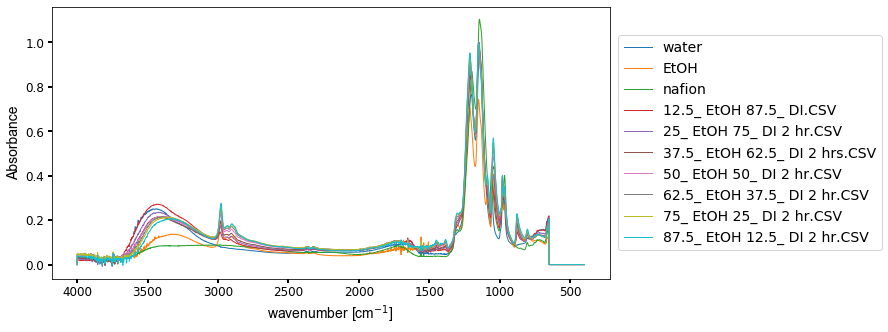

In [58]:
fig = plt.figure()
ax = plt.axes()
ax.plot(water.index,water.iloc[:,0],linewidth = 1,)
ax.plot(ethanol.index,ethanol.iloc[:,0],linewidth = 1,)

ax.plot(nafion.index,nafion.iloc[:,0],linewidth = 1,)

for j in dic_samples_norm[lab_samples]:
    df = dic_samples_norm[lab_samples][j]
    ax.plot(df.index,df.iloc[:,0],linewidth = 1)

ax.tick_params(length = 4, labelsize= 12, width =2)
ax.set_ylabel('Absorbance', fontsize=14, fontname = 'Arial')
ax.set_xlabel('wavenumber [cm$^{-1}$]', fontsize=14, fontname = 'Arial')
#ax.set_title(path,fontsize=16,fontname = 'Arial')
ax.invert_xaxis()
fig.set_size_inches(10, 5)
plt.legend(legend, fontsize = 14, loc = 'right', bbox_to_anchor=(1.5, 0.5))
plt.show()

In [59]:
nafion_abs = np.interp(ethanol.index,nafion.index,nafion.Absorbance)

nafion.reset_index(inplace = True)
nafion['wn'] = ethanol.index
nafion['Absorbance'] = nafion_abs
nafion.set_index('wn', inplace = True)

water_abs = np.interp(list(ethanol.index),list(water.index),list(water.iloc[:,0]))

water.reset_index(inplace = True)
water['wn'] = ethanol.index
water.set_index('wn', inplace = True)

In [60]:

n = 3

col_labels = np.round(wn).astype('str')
col_labels = np.concatenate((['water','EtOH','nafion'],col_labels),axis = 0)
data = pd.DataFrame(np.zeros((n,len(wn)+3)),columns = col_labels)

In [61]:
pure_components = pd.concat([water.iloc[:,0],ethanol.iloc[:,0],nafion.iloc[:,0]], axis = 1)
pure_components.columns = ['water','EtOH','nafion']


In [62]:
Comp = np.array([[1,0,0],[0,1,0],[0,0,1]])

In [63]:
Comp_sums = Comp.sum(axis=1)
Comp = Comp / Comp_sums[:, np.newaxis]

for x in range(len(Comp)):
    vec = Comp[x,:]
    spectra = np.sum(vec*pure_components,axis =1)
    data.iloc[x,3:] = np.asarray(spectra)

In [64]:
data.water = Comp[:,0];
data.EtOH = Comp[:,1];
data.nafion = Comp[:,2];

In [65]:
data

,water,EtOH,nafion,650.0,650.0,651.0,651.0,651.0,651.0,652.0,...,3598.0,3598.0,3598.0,3599.0,3599.0,3599.0,3599.0,3599.0,3600.0,3600.0
0,1.0,0.0,0.0,0.219060,0.218745,0.218475,0.218234,0.217995,0.217730,0.217419,...,0.140560,0.140185,0.139866,0.139610,0.139429,0.139326,0.139283,0.139263,0.139207,0.139047
1,0.0,1.0,0.0,0.153491,0.153286,0.153138,0.152980,0.152732,0.152312,0.151651,...,0.038046,0.039427,0.040397,0.040885,0.041003,0.040959,0.040939,0.041035,0.041219,0.041345
2,0.0,0.0,1.0,0.173389,0.173225,0.172990,0.172700,0.172375,0.172035,0.171703,...,0.039839,0.039638,0.039576,0.039674,0.039919,0.040272,0.040682,0.041095,0.041452,0.041685


In [66]:
X = data.iloc[:,3:]
y = data.iloc[:,:2]

mlp = LinearRegression()
mlp.fit(X,y)


LinearRegression()

In [68]:
mlp.coef_

array([[-0.00998633,  0.00692518,  0.00181631, ...,  0.00312643,
         0.0031242 ,  0.00324502],
       [-0.00642613,  0.00089942, -0.00130856, ..., -0.00171061,
        -0.00170458, -0.00164364]])

In [69]:
mlp.intercept_

array([-0.61579827,  2.40758735])

In [70]:
pca = PCA()
X = pca.fit_transform(X)

mlp_pca = LinearRegression()
mlp_pca.fit(X,y)

LinearRegression()

In [71]:
col_labels = np.round(wn).astype('str')
samples = pd.DataFrame(index = dic_samples[lab_samples].keys(),columns = col_labels)


for j in dic_samples[lab_samples]:
    df = dic_samples[lab_samples][j]
    df = df.loc[df.index>low]
    df = df.loc[df.index<high]
    samples.loc[j,:] = np.interp(wn,df.index,df.Absorbance)

In [72]:
samples

wn,650.0,650.0,651.0,651.0,651.0,651.0,652.0,652.0,652.0,652.0,...,3598.0,3598.0,3598.0,3599.0,3599.0,3599.0,3599.0,3599.0,3600.0,3600.0
12.5_ EtOH 87.5_ DI.CSV,0.191649,0.191914,0.192242,0.192557,0.192785,0.192867,0.192769,0.192491,0.192076,0.191602,...,0.117119,0.11646,0.115896,0.115437,0.115056,0.114703,0.114329,0.113905,0.113423,0.11289
25_ EtOH 75_ DI 2 hr.CSV,0.179712,0.179327,0.178896,0.178457,0.17805,0.177704,0.177427,0.177211,0.17704,0.17689,...,0.0832303,0.0823305,0.0815738,0.081018,0.0806498,0.0804029,0.0801941,0.0799592,0.0796681,0.0793313
37.5_ EtOH 62.5_ DI 2 hrs.CSV,0.166738,0.166481,0.166445,0.166611,0.166914,0.167253,0.167512,0.167594,0.167444,0.167067,...,0.0627549,0.0619159,0.0613102,0.0609549,0.0607796,0.0606634,0.0604915,0.0601966,0.0597727,0.0592769
50_ EtOH 50_ DI 2 hr.CSV,0.161453,0.161833,0.162211,0.162548,0.162786,0.162861,0.162726,0.162378,0.161867,0.161285,...,0.0574091,0.0570392,0.0568235,0.0567462,0.0567531,0.0567721,0.0567419,0.0566278,0.0564238,0.056148
62.5_ EtOH 37.5_ DI 2 hr.CSV,0.159322,0.159205,0.159092,0.158952,0.158748,0.158447,0.158031,0.1575,0.156876,0.156188,...,0.0473383,0.0469286,0.0467759,0.0468434,0.0470133,0.0471392,0.0471,0.0468389,0.0463699,0.0457735
75_ EtOH 25_ DI 2 hr.CSV,0.152976,0.153016,0.153031,0.152988,0.152877,0.152699,0.152461,0.152177,0.151857,0.15151,...,0.0399328,0.0391522,0.038613,0.0383373,0.0382611,0.0382682,0.0382449,0.0381188,0.0378718,0.0375427
87.5_ EtOH 12.5_ DI 2 hr.CSV,0.152431,0.152759,0.152982,0.153035,0.152871,0.152465,0.15182,0.150972,0.149985,0.148934,...,0.029001,0.0282417,0.0277118,0.0274209,0.0272992,0.0272372,0.0271346,0.0269324,0.0266217,0.0262412


In [73]:
water_sat_val = [87.5,75,62.5,50,37.5,25,12.5]
EtOH_sat_val = [12.5,25,37.5,50,62.5,75,87.5]

In [74]:
samples['EtOH sat'] = EtOH_sat_val
samples['water sat'] = water_sat_val

In [75]:
samples.sort_values(by = ['EtOH sat'],axis = 0, inplace = True)

In [76]:
samples

wn,650.0,650.0,651.0,651.0,651.0,651.0,652.0,652.0,652.0,652.0,...,3598.0,3599.0,3599.0,3599.0,3599.0,3599.0,3600.0,3600.0,EtOH sat,water sat
12.5_ EtOH 87.5_ DI.CSV,0.191649,0.191914,0.192242,0.192557,0.192785,0.192867,0.192769,0.192491,0.192076,0.191602,...,0.115896,0.115437,0.115056,0.114703,0.114329,0.113905,0.113423,0.11289,12.5,87.5
25_ EtOH 75_ DI 2 hr.CSV,0.179712,0.179327,0.178896,0.178457,0.17805,0.177704,0.177427,0.177211,0.17704,0.17689,...,0.0815738,0.081018,0.0806498,0.0804029,0.0801941,0.0799592,0.0796681,0.0793313,25.0,75.0
37.5_ EtOH 62.5_ DI 2 hrs.CSV,0.166738,0.166481,0.166445,0.166611,0.166914,0.167253,0.167512,0.167594,0.167444,0.167067,...,0.0613102,0.0609549,0.0607796,0.0606634,0.0604915,0.0601966,0.0597727,0.0592769,37.5,62.5
50_ EtOH 50_ DI 2 hr.CSV,0.161453,0.161833,0.162211,0.162548,0.162786,0.162861,0.162726,0.162378,0.161867,0.161285,...,0.0568235,0.0567462,0.0567531,0.0567721,0.0567419,0.0566278,0.0564238,0.056148,50.0,50.0
62.5_ EtOH 37.5_ DI 2 hr.CSV,0.159322,0.159205,0.159092,0.158952,0.158748,0.158447,0.158031,0.1575,0.156876,0.156188,...,0.0467759,0.0468434,0.0470133,0.0471392,0.0471,0.0468389,0.0463699,0.0457735,62.5,37.5
75_ EtOH 25_ DI 2 hr.CSV,0.152976,0.153016,0.153031,0.152988,0.152877,0.152699,0.152461,0.152177,0.151857,0.15151,...,0.038613,0.0383373,0.0382611,0.0382682,0.0382449,0.0381188,0.0378718,0.0375427,75.0,25.0
87.5_ EtOH 12.5_ DI 2 hr.CSV,0.152431,0.152759,0.152982,0.153035,0.152871,0.152465,0.15182,0.150972,0.149985,0.148934,...,0.0277118,0.0274209,0.0272992,0.0272372,0.0271346,0.0269324,0.0266217,0.0262412,87.5,12.5


In [77]:
mlp.predict(samples.iloc[:,:-2])

array([[0.83268759, 0.2438188 ],
       [0.54339159, 0.4439906 ],
       [0.37524213, 0.58429878],
       [0.31314197, 0.69028622],
       [0.23995854, 0.79201652],
       [0.17201598, 0.87338527],
       [0.07908287, 0.96437814]])

In [78]:
samples_pca = pca.transform(samples.iloc[:,:-2])

In [79]:
mlp_pca.predict(samples_pca)

array([[0.83236634, 0.24367971],
       [0.54338333, 0.44398702],
       [0.37542095, 0.5843762 ],
       [0.31310576, 0.69027054],
       [0.23997115, 0.79202198],
       [0.17188796, 0.87332984],
       [0.07900568, 0.96434471]])

In [80]:
models = ['LR', 'LR with PCA']

results_water = pd.DataFrame(index = samples.index, columns = models)
results_water['Water %'] = samples['water sat']
results_water['EtOH %'] = samples['EtOH sat']

In [81]:
results_water.LR = mlp.predict(samples.iloc[:,:-2])[:,0]
results_water['LR with PCA'] = mlp_pca.predict(samples_pca)[:,0]


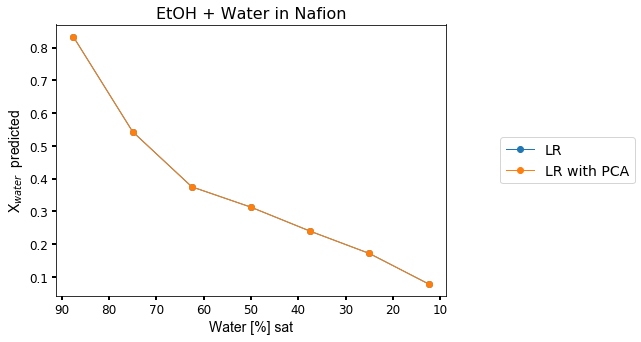

In [82]:
fig = plt.figure()
ax = plt.axes()

for j in models:
    ax.plot(results_water['Water %'],results_water[j],'-o',linewidth = 1,)

ax.tick_params(length = 4, labelsize= 12, width =2)
ax.set_ylabel('X$_{water}$  predicted', fontsize=14, fontname = 'Arial')
ax.set_xlabel('Water [%] sat', fontsize=14, fontname = 'Arial')
#ax.set_title(path,fontsize=16,fontname = 'Arial')
ax.invert_xaxis()
fig.set_size_inches(7, 5)
plt.legend(models, fontsize = 14, loc = 'right', bbox_to_anchor=(1.5, 0.5))
plt.title('EtOH + Water in Nafion', fontsize = 16)
plt.show()

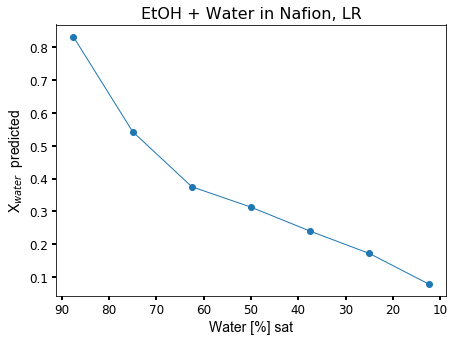

In [83]:
fig = plt.figure()
ax = plt.axes()

ax.plot(results_water['Water %'],results_water[j],'-o',linewidth = 1,)

ax.tick_params(length = 4, labelsize= 12, width =2)
ax.set_ylabel('X$_{water}$  predicted', fontsize=14, fontname = 'Arial')
ax.set_xlabel('Water [%] sat', fontsize=14, fontname = 'Arial')
#ax.set_title(path,fontsize=16,fontname = 'Arial')
ax.invert_xaxis()
fig.set_size_inches(7, 5)
#plt.legend(models, fontsize = 14, loc = 'right', bbox_to_anchor=(1.5, 0.5))
plt.title('EtOH + Water in Nafion, LR', fontsize = 16)
plt.show()

In [84]:
models = ['LR', 'LR with PCA']

results_EtOH = pd.DataFrame(index = samples.index, columns = models)
results_EtOH['Water %'] = samples['water sat']
results_EtOH['EtOH %'] = samples['EtOH sat']

results_EtOH.LR = mlp.predict(samples.iloc[:,:-2])[:,1]
results_EtOH['LR with PCA'] = mlp_pca.predict(samples_pca)[:,1]


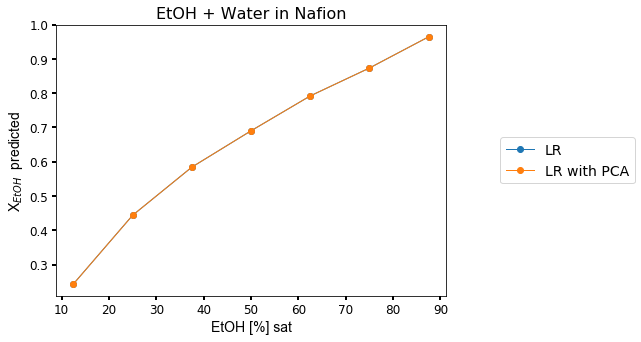

In [85]:
fig = plt.figure()
ax = plt.axes()

for j in models:
    ax.plot(results_EtOH['EtOH %'],results_EtOH[j],'-o',linewidth = 1,)

ax.tick_params(length = 4, labelsize= 12, width =2)
ax.set_ylabel('X$_{EtOH}$  predicted', fontsize=14, fontname = 'Arial')
ax.set_xlabel('EtOH [%] sat', fontsize=14, fontname = 'Arial')
#ax.set_title(path,fontsize=16,fontname = 'Arial')

fig.set_size_inches(7, 5)
plt.legend(models, fontsize = 14, loc = 'right', bbox_to_anchor=(1.5, 0.5))
plt.title('EtOH + Water in Nafion', fontsize = 16)
plt.show()

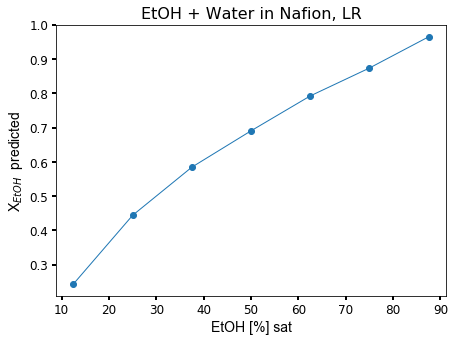

In [52]:
fig = plt.figure()
ax = plt.axes()

ax.plot(results_EtOH['EtOH %'],results_EtOH['LR'],'-o',linewidth = 1,)

ax.tick_params(length = 4, labelsize= 12, width =2)
ax.set_ylabel('X$_{EtOH}$  predicted', fontsize=14, fontname = 'Arial')
ax.set_xlabel('EtOH [%] sat', fontsize=14, fontname = 'Arial')
#ax.set_title(path,fontsize=16,fontname = 'Arial')

fig.set_size_inches(7, 5)
#plt.legend(models, fontsize = 14, loc = 'right', bbox_to_anchor=(1.5, 0.5))
plt.title('EtOH + Water in Nafion, LR', fontsize = 16)
plt.show()

In [36]:
MW  = 46.069 #g/mol, molecular weight
den = 789.45 #g/L

MW_w = 18
den_w = 1000

In [37]:
results_water.iloc[:,:-2] = results_water.iloc[:,:-2]*den_w/MW_w
results_EtOH.iloc[:,:-2] = results_EtOH.iloc[:,:-2]*den/MW

In [38]:
results_water

,LR,LR with PCA,"NN (100,100)","NN (150,150)","NN (200,200)","NN (400,400)","NN with PCA (2,2)",Water %,EtOH %
12.5_ EtOH 87.5_ DI.CSV,11.221691,11.175067,14.201179,15.642117,10.179681,12.292637,12.483888,87.5,12.5
25_ EtOH 75_ DI 2 hr.CSV,8.261401,8.198896,11.504735,13.779357,7.638969,9.650767,9.664812,75.0,25.0
37.5_ EtOH 62.5_ DI 2 hrs.CSV,6.616735,6.540038,9.818581,13.117916,6.270578,8.323968,8.225793,62.5,37.5
50_ EtOH 50_ DI 2 hr.CSV,5.745847,5.664499,9.376260,13.682472,5.823497,8.319686,7.761294,50.0,50.0
62.5_ EtOH 37.5_ DI 2 hr.CSV,5.106147,5.023122,9.019393,13.661825,5.385226,7.769863,7.283220,37.5,62.5
75_ EtOH 25_ DI 2 hr.CSV,4.802984,4.715051,8.835767,13.562202,5.153338,7.281116,7.010467,25.0,75.0
87.5_ EtOH 12.5_ DI 2 hr.CSV,4.954372,4.866514,8.780654,13.177572,5.397085,6.404339,6.969036,12.5,87.5


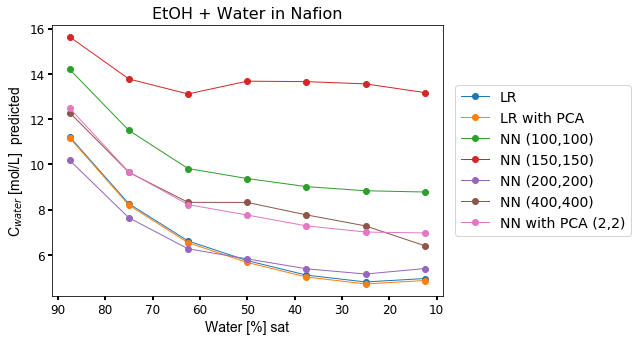

In [39]:
fig = plt.figure()
ax = plt.axes()

for j in models:
    ax.plot(results_water['Water %'],results_water[j],'-o',linewidth = 1,)

ax.tick_params(length = 4, labelsize= 12, width =2)
ax.set_ylabel('C$_{water}$ [mol/L]  predicted', fontsize=14, fontname = 'Arial')
ax.set_xlabel('Water [%] sat', fontsize=14, fontname = 'Arial')
#ax.set_title(path,fontsize=16,fontname = 'Arial')
ax.invert_xaxis()
fig.set_size_inches(7, 5)
plt.legend(models, fontsize = 14, loc = 'right', bbox_to_anchor=(1.5, 0.5))
plt.title('EtOH + Water in Nafion', fontsize = 16)
plt.show()

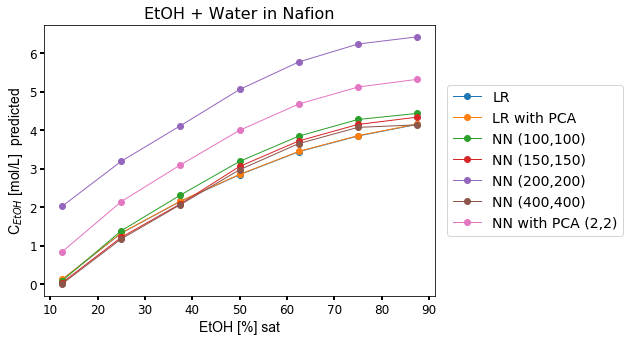

In [40]:
fig = plt.figure()
ax = plt.axes()

for j in models:
    ax.plot(results_EtOH['EtOH %'],results_EtOH[j],'-o',linewidth = 1,)

ax.tick_params(length = 4, labelsize= 12, width =2)
ax.set_ylabel('C$_{EtOH}$ [mol/L]  predicted', fontsize=14, fontname = 'Arial')
ax.set_xlabel('EtOH [%] sat', fontsize=14, fontname = 'Arial')
#ax.set_title(path,fontsize=16,fontname = 'Arial')

fig.set_size_inches(7, 5)
plt.legend(models, fontsize = 14, loc = 'right', bbox_to_anchor=(1.5, 0.5))
plt.title('EtOH + Water in Nafion', fontsize = 16)
plt.show()

In [41]:
#results_water.to_csv(lab_samples+'\Water Scores.csv')

In [42]:
#results_EtOH.to_csv(lab_samples+'\EtOH Scores.csv')